<a href="https://colab.research.google.com/github/NataliProhorova/Data-_Pyton-_Code_Info/blob/main/V3_Mongo_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pymongo

In [ ]:
from pymongo import MongoClient

# MongoDB connection string
client = MongoClient ("mongodb://localhost:27017/?appName=MongoDB+Compass&directConnection=true&serverSelectionTimeoutMS=2000")




In [ ]:
db=client.get_database('Showroom')

In [ ]:
db=client['Customers']

# New section

In [ ]:
collection_1=db['Customers']
collection_2=db['Vehicles']
collection_3=db['Orders']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
docs=list(collection_1.find())



In [ ]:
docs=list(collection_2.find())

In [ ]:
import pandas as pd

display(df_collection_2.head())


,_id,itemID,category,model,year,specs.engine,specs.transmission,specs.fuelType,specs.colorOptions[1],specs.colorOptions[2],Color,quantity,inStock,price,orderStatus,quantity.sell,colorOptions[0].inStock
0,686fd5db06a0503f47a2cca9,PV-1752159707278-58165,Luxury,Audi,2024,NaN,Automatic,Petrol,NaN,NaN,Champagne,4,True,72000,cancelled,1,1.0
1,686fd5db06a0503f47a2ccb1,PV-1752159707278-46892,Luxury,Audi,2024,NaN,Automatic,Petrol,NaN,NaN,Champagne,1,True,72000,cancelled,1,1.0
2,686fd5db06a0503f47a2cca5,PV-1752159707278-66288,SUV,Audi Q4 e-tron,2024,NaN,Automatic,Electric,NaN,NaN,Orange,5,True,48000,processed,1,1.0
3,686fd2c706a0503f47a2cca2,PV-1752158919691-46411,Hibrid,BMW i4,2024,NaN,Automatic,Electric,NaN,NaN,Green,5,True,52000,processed,1,1.0
4,686fd5db06a0503f47a2cca4,PV-1752159707278-04675,Hibrid,BMW i4,2024,NaN,Tiptronic,Electric,NaN,NaN,Green,5,True,52000,processed,1,1.0


**DAta cleaning**

In [ ]:
columns_to_drop = ['_id',"itemID", 'specs.engine', 'specs.colorOptions[1]', 'specs.colorOptions[2]', 'colorOptions[0].inStock']
df_vehicles= df_vehicles.drop(columns=columns_to_drop)

# Display the head of the cleaned DataFrame to verify
display(df_vehicles_cleaned.head())

,category,model,year,specs.transmission,specs.fuelType,Color,quantity,inStock,price,orderStatus,quantity.sell
0,Luxury,Audi,2024,Automatic,Petrol,Champagne,4,True,72000,cancelled,1
1,Luxury,Audi,2024,Automatic,Petrol,Champagne,1,True,72000,cancelled,1
2,SUV,Audi Q4 e-tron,2024,Automatic,Electric,Orange,5,True,48000,processed,1
3,Hibrid,BMW i4,2024,Automatic,Electric,Green,5,True,52000,processed,1
4,Hibrid,BMW i4,2024,Tiptronic,Electric,Green,5,True,52000,processed,1


**Visualisation for collection "Vehicles"**

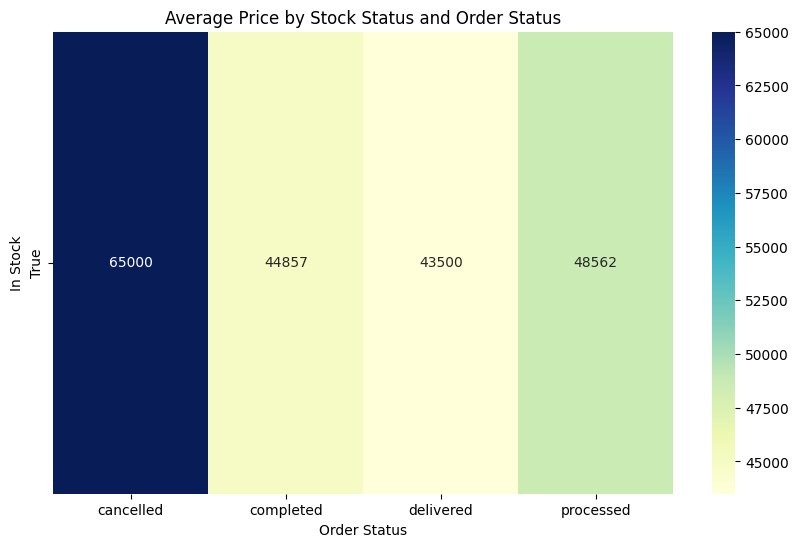

In [ ]:
#1. Heatmap comparing average price against stock levels and order status

# Group by inStock and orderStatus and calculate the mean price
heatmap_data = df_vehicles.groupby(['inStock', 'orderStatus'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Stock Status and Order Status')
plt.xlabel('Order Status')
plt.ylabel('In Stock')
plt.show()

The heatmap  visualizes the average price of vehicles based on their stock status (inStock) and their order status (orderStatus).

Each cell in the heatmap represents a unique combination of whether a vehicle is in stock and its current order status.
The color intensity in each cell indicates the average price for vehicles in that specific combination,
The numerical value within each cell is the calculated average price.
This visualization helps  quickly identify if there are any noticeable patterns in average price related to whether vehicles are in stock or the stage of their order. For example,  see the average price of vehicles that are in stock and have been delivered compared to those that are in stock and have been cancelled.

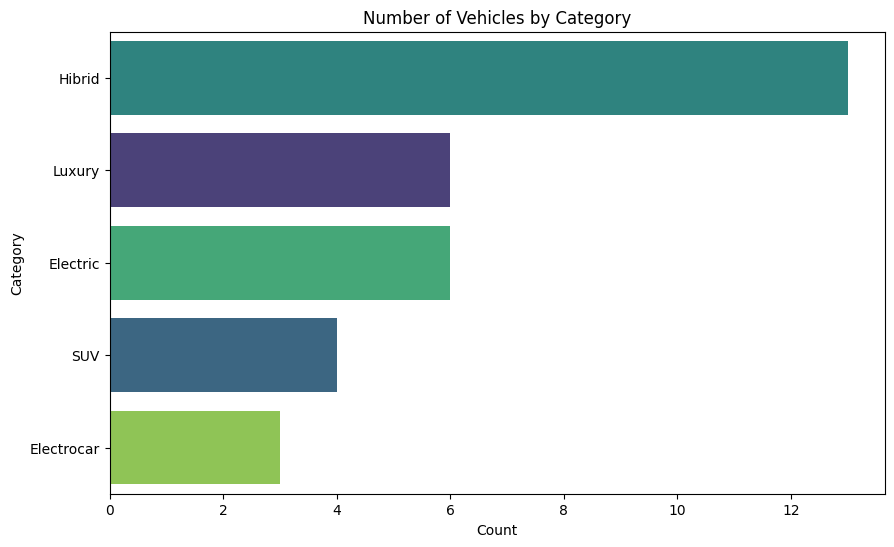

In [ ]:
plt.figure(figsize=(10, 6))
# Using a different color palette like 'viridis', 'plasma', 'inferno', 'magma', or 'cividis'

sns.countplot(data=df_vehicles, y='category', order=df_vehicles_excel_cleaned['category'].value_counts().index, hue='category', palette='viridis', legend=False)
plt.title('Number of Vehicles by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

This bar chart visualizes the distribution of vehicles across different categories.

**Visualization Description**: . Each bar represents a unique vehicle category. The categories are ordered from most frequent to least frequent, making it easy to identify the most common vehicle types in the  dataset.

**Color Choice Description**: Instead of using the default palette, the 'viridis' palette was chosen to provide a distinct color for each vehicle category. This makes it easier to visually separate and identify the different categories in the bar chart.

In [ ]:
import pandas as pd


In [ ]:
# review data shape,drop columns
df_customers.shape

(31, 11)

In [ ]:
df_customers.head()

,_id,Town,nationality,drivingExp,Model,Color,Year,Price,Customer_Name,order_Status,payment_Status
0,686ef1a87439675bfd2a11e6,Limerick,Irish,11,Ford Escape Hybrid,White,2023,33500,Isla Fitzgerald,completed,completed
1,686ef2797439675bfd2a11e7,Dundalk,Danish,6,Toyota Prius,Blue,2022,28900,Freja Nielsen,completed,completed
2,686ef2e67439675bfd2a11e8,Dublin,French,9,Mercedes-Benz E-Class,Silver,2023,58000,Julien Moreau,completed,completed
3,686ef32f7439675bfd2a11e9,Dublin,Lithuanian,7,Lexus ES 350,Pearl White,2024,54000,Egle Petrauskiene,completed,completed
4,686ef4057439675bfd2a11ea,Cork,Polish,10,Toyota Prius,Gray,2022,27200,Kacper Nowak,completed,completed


In [ ]:
df_customers = df_customers.drop(columns=['_id'])

In [ ]:
df_customers.head(25)

,Town,nationality,drivingExp,Model,Color,Year,Price,Customer_Name,order_Status,payment_Status
0,Limerick,Irish,11,Ford Escape Hybrid,White,2023,33500,Isla Fitzgerald,completed,completed
1,Dundalk,Danish,6,Toyota Prius,Blue,2022,28900,Freja Nielsen,completed,completed
2,Dublin,French,9,Mercedes-Benz E-Class,Silver,2023,58000,Julien Moreau,completed,completed
3,Dublin,Lithuanian,7,Lexus ES 350,Pearl White,2024,54000,Egle Petrauskiene,completed,completed
4,Cork,Polish,10,Toyota Prius,Gray,2022,27200,Kacper Nowak,completed,completed
5,Cork,Irish,6,Ford Escape Hybrid,Black,2022,29200,Ava Byrne,completed,completed
6,Dublin,Irish,8,Hyundai Ioniq,Black,2023,31000,Emily Walsh,completed,completed
7,Wexford,Irish,12,Tesla,White,2023,35000,Liam O'Connor,completed,completed
8,Sligo,Polish,9,Tesla,Blue,2023,36500,Tomasz Kowalski,completed,completed
9,Dublin,Italian,13,Tesla,Silver,2023,33500,Chiara Bianchi,completed,completed


# Vizualisztion
Data was already crrated on MongoDB

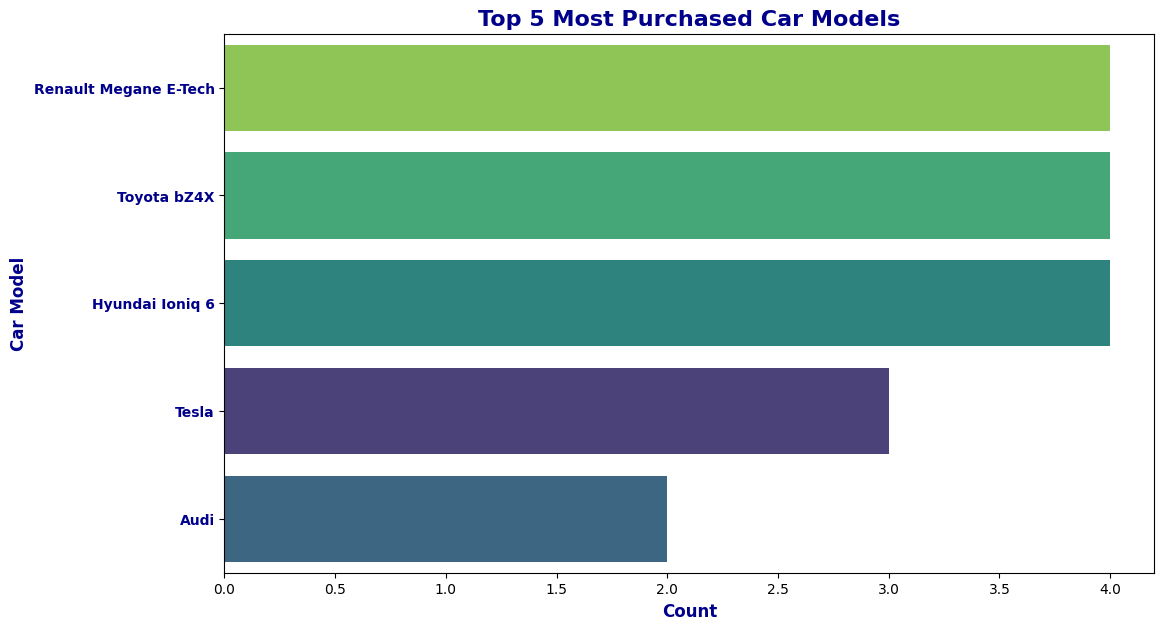

In [ ]:
# Get the top 5 most frequent car models
top_5_models = df_customers['Model'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 models
df_top_5_models = df_customers[df_customers['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 7))
sns.countplot(data=df_top_5_models, y='Model', order=top_5_models, hue='Model', palette='viridis', legend=False)
plt.title('Top 5 Most Purchased Car Models', fontsize=16, fontweight='bold', color='darkblue') # Make title bold and dark blue
plt.xlabel('Count', fontsize=12, fontweight='bold', color='darkblue') # Make xlabel bold and dark blue
plt.ylabel('Car Model', fontsize=12, fontweight='bold', color='darkblue') # Make ylabel bold and dark blue
plt.yticks(fontweight='bold', color='darkblue') # Make ytick labels bold and dark blue
plt.show()

#
Analyze customer preferences by nationalityby nationality using the dataframe `df_customers`.

## Analyze customer preferences by nationality



Top 5   Towns   by customers  vizualisation, using  modern assesable color pallete

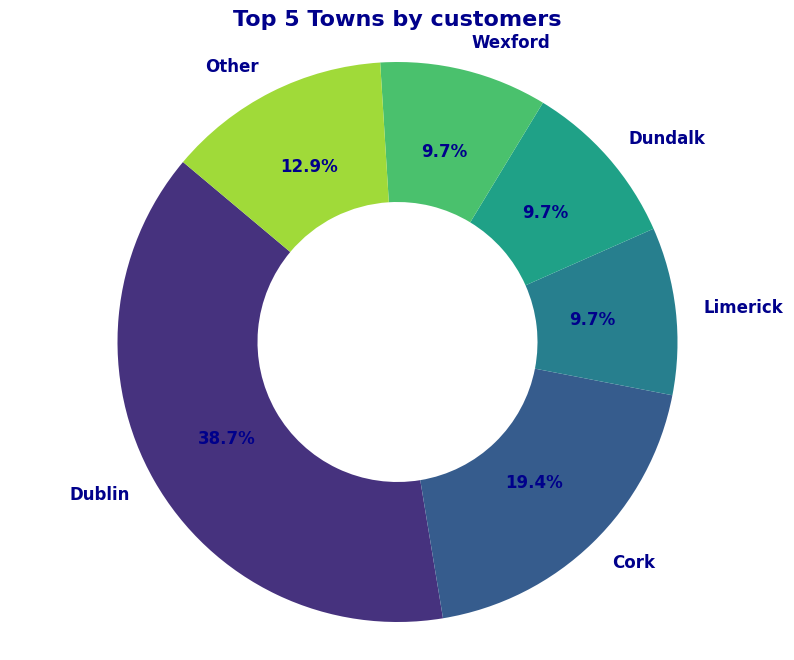

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



town_counts = df_customers['Town'].value_counts()

# Get the top 5 towns
top_5_towns = town_counts.nlargest(5)

# Calculate the count for the 'Other' category
other_count = town_counts[~town_counts.index.isin(top_5_towns.index)].sum()

# Combine top 5 towns with 'Other'
if other_count > 0:
    top_5_towns['Other'] = other_count

colors = sns.color_palette('viridis', len(top_5_towns))

plt.figure(figsize=(10, 8))
plt.pie(top_5_towns, labels=top_5_towns.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5),
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'darkblue'},
        pctdistance=0.7, colors=colors)
plt.title('Top 5 Towns by customers', fontsize=16, fontweight='bold', color='darkblue')
plt.axis('equal')
plt.show()

**Color choice** :
Modern and Vibrant: The palette transitions from a deep purple through blues and greens to a bright yellow, which is often considered a modern and visually appealing color scheme. This can resonate well with a younger audience.

## Create dropdown widget


Create an `ipywidgets.Dropdown` widget populated with the unique car models from


In [ ]:
#import libroaryes
import ipywidgets as widgets
from IPython.display import display

In [ ]:
#create a filter for models
car_models = df_customers['Model'].unique().tolist()
car_model_dropdown = widgets.Dropdown(
    options=car_models,
    description='Select Car Model:',
)


Define a function to filter and display the DataFrame based on the selected car model.



In [ ]:
def display_car_data(selected_model):
    """Filters and displays the DataFrame based on the selected car model."""
    filtered_df = df_customers[df_customers['Model'] == selected_model]
    display(filtered_df)

In [ ]:
interactive_widget = widgets.interactive(display_car_data, selected_model=car_model_dropdown)

In [ ]:
#Display the interactive widget using the display function
display(interactive_widget)


* An interactive widget  includes a dropdown menu with unique car models from the `df_customers`
*   The interactive widget provides a user-friendly way to explore car data by model.
